In [1]:
## imports

# nd array manipulation
import numpy as np

from scipy import ndimage

# plotting with matplotlib, interactive notebook with jplot style
%matplotlib widget
import matplotlib.pyplot as plt
#from jupyterthemes import jtplot; jtplot.style()

# 3d plotting toolkit
from mpl_toolkits.mplot3d import Axes3D

# colour mapping helpers
import matplotlib.colors as colors
import matplotlib.cm as cmx


In [2]:
# set auto reload imported modules tagged
%load_ext autoreload
%autoreload 2

# add custom python packages directory to path
import sys
sys.path.append('/home/brendan/dev/optics')

# import path tracing and image transformation engine
import optics


In [3]:
''' Test Sphere Scale and Axis '''


## plot ray paths

# initialise 3d figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(-2., 2.)
ax.set_ylim(-2., 2.)
ax.set_zlim(-2., 2.)


n2 = 1.0
rev = False
C = np.array([0., 0., 0.])
r = 1.

es = [1., 0.8]

cnorm = colors.Normalize(vmin = 0, vmax = len(es)); smap = cmx.ScalarMappable(norm = cnorm, cmap = 'magma_r')

for i in range(len(es)):
    
    c = smap.to_rgba(i)
    
    #e = np.array([ es[i] , 1., 1.])
    e = np.array([ 1., es[i], 1.])

    # get optic points in 3d for plotting
    x, y, z = optics.plot_3d_ellipsoid(C, r, e, rev, 0., full = False)
    # plot ellipsoid
    ax.plot_wireframe(x, y, z,  rstride = 3, cstride = 3, color = c, alpha = 0.5, label = '{}'.format(es[i]))


# format and display figure
plt.legend()
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
''' Test Sphere Scale and Axis '''


## plot ray paths

# initialise 3d figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(-2., 2.)
ax.set_ylim(-2., 2.)
ax.set_zlim(-2., 2.)


n2 = 1.0
rev = False
C = np.array([0., 0., 0.])
r = 1.

es = [1., 1.2]

cnorm = colors.Normalize(vmin = 0, vmax = len(es)); smap = cmx.ScalarMappable(norm = cnorm, cmap = 'magma_r')

for ei in range(len(es)):
    
    c = smap.to_rgba(ei)
    
    #e = np.array([ es[i] , 1., 1.])
    e = np.array([ 1., es[ei], 1.])

    # generate and plot lens (ellipsoid)
    rx, ry, rz = np.array(e) * r

    # set of all spherical angles:
    #u = np.linspace(0.5 * np.pi, 1.5 * np.pi, 50)
    u = np.linspace(0.5 * np.pi, 1.5 * np.pi, 50)
    if True:
        k = np.linspace(0., 2*np.pi, 50)
    else:
        k = np.linspace(0., np.pi, 50)

    theta = np.deg2rad(0)
    rotate = np.array([[1,0,0], [0, np.cos(theta), -np.sin(theta)], [0, np.sin(theta), np.cos(theta)]])
        
    # Cartesian coordinates that correspond to the spherical angles:
    # (this is the equation of an ellipsoid):
    x = rx * np.outer(np.cos(u), np.sin(k))# + C[0]
    y = ry * np.outer(np.sin(u), np.sin(k))# + C[1]
    z = rz * np.outer(np.ones_like(u), np.cos(k))# + C[2]
    
    for i in range(len(x)):
        for j in range(len(x)):
            [x[i,j],y[i,j],z[i,j]] = np.dot([x[i,j],y[i,j],z[i,j]], rotate) + C
    
    # plot ellipsoid
    ax.plot_wireframe(x, y, z,  rstride = 3, cstride = 3, color = c, alpha = 0.5, label = '{}'.format(es[ei]))


# format and display figure
plt.legend()
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [5]:

opts = [
    { # cornea
        'centre': np.array([(0. + 5.*np.sqrt(0.5)), 0., 0.]),
        'opt_den': 2.,
        'scale': np.array([np.sqrt(0.5), 1.3, 1.]), # conic constant of -0.5
        'rotation_x': 45.,
        'radius': 5.,
        #'rev': False,
        'rev': True,
    },
    { # iris
        'centre': np.array([(-20.), 0., 0.]),
        'opt_den': 1.336,
        'scale': np.array([0.01, 1., 1.]),
        'rotation_x': 0.,
        'radius': 10,
        #'rev': False,
        'rev': True,
    },
]

In [6]:
rays = []

## ray tracing
stp = 1.
rng = 5.
for Lz in np.arange(-rng, rng + stp, stp)[:]:
    for Ly in np.arange(-rng, rng + stp, stp)[:]:
        
        # origin ray position and direction vector
        L0 = np.array([10., Ly, Lz])
        v = np.array([-1., 0., 0.])
        # normalise direction vector to unit
        v = v / np.linalg.norm(v)
        
        rays.append([L0, v])


In [7]:
# get ray paths through optics chain
paths = optics.get_paths(rays, opts)


ValueError: all the input arrays must have same number of dimensions

In [8]:
## plot ray paths

# initialise 3d figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(0., 20.)
ax.set_ylim(-10., 10.)
ax.set_zlim(-10., 10.)


# plot all optics
if True:
    # iterate over each optic in chain
    for optic in opts[:-1]:
        
        # get optic parameters
        C = optic['centre']
        r = optic['radius']
        e = optic['scale']
        n2 = optic['opt_den']
        rev = optic['rev']

        # get optic points in 3d for plotting
        x, y, z = optics.plot_3d_ellipsoid(C, r, e, rev, 0.)
        # plot ellipsoid
        ax.plot_wireframe(x, y, z,  rstride = 2, cstride = 2, color = 'k', alpha = 0.5)


# iterate over each ray path
for i in range(len(paths)):
    
    # check for any refraction of ray with optics
    if len(paths[i]) > 1:
    
        path = paths[i]

        # iterate ray path through optics
        for j in range(len(path)-1):

            # plot path segment
            ax.plot([path[j][0][0], path[j+1][0][0]],
                    [path[j][0][1], path[j+1][0][1]],
                    [path[j][0][2], path[j+1][0][2]],
                    color = 'r', alpha = 0.7)

# format and display figure
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

NameError: name 'paths' is not defined

In [9]:
# generate standard optics chain
params = {
    'eye_front': 20.,
    'cornea_sph': 1.,
    'cornea_axis': 0.,
    'cornea_pow': np.sqrt(0.5),
    'cornea_f_rad': 7.8,
    'cornea_r_rad': 6.4,
    'cornea_thick': 0.6,
    'aqueous_thick': 3.0,
    'iris_dia': 4.,
    'lens_thick': 4.,
    'lens_f_rad_max': 10.1,
    'lens_f_rad_min': 5.95,
    'lens_r_rad_max': 6.1,
    'lens_r_rad_min': 4.5,
    'focus': 0.,
    'lens_pow': np.sqrt(4.5),
    'retina_rad': 12.5,
}
opts = optics.gen_optics(params)


KeyError: 'retina_thick'

In [10]:
rays = []

## ray tracing
stp = .5
rng = 3.
for Lz in np.arange(-rng, rng + stp, stp)[:]:
    for Ly in np.arange(-rng, rng + stp, stp)[:]:
        
        # origin ray position and direction vector
        L0 = np.array([0., Ly, Lz])
        v = np.array([1., 0., 0.])
        # normalise direction vector to unit
        v = v / np.linalg.norm(v)
        
        rays.append([L0, v])


In [19]:
# get ray paths through optics chain
paths = optics.get_paths(rays, opts)


<IPython.core.display.Javascript object>


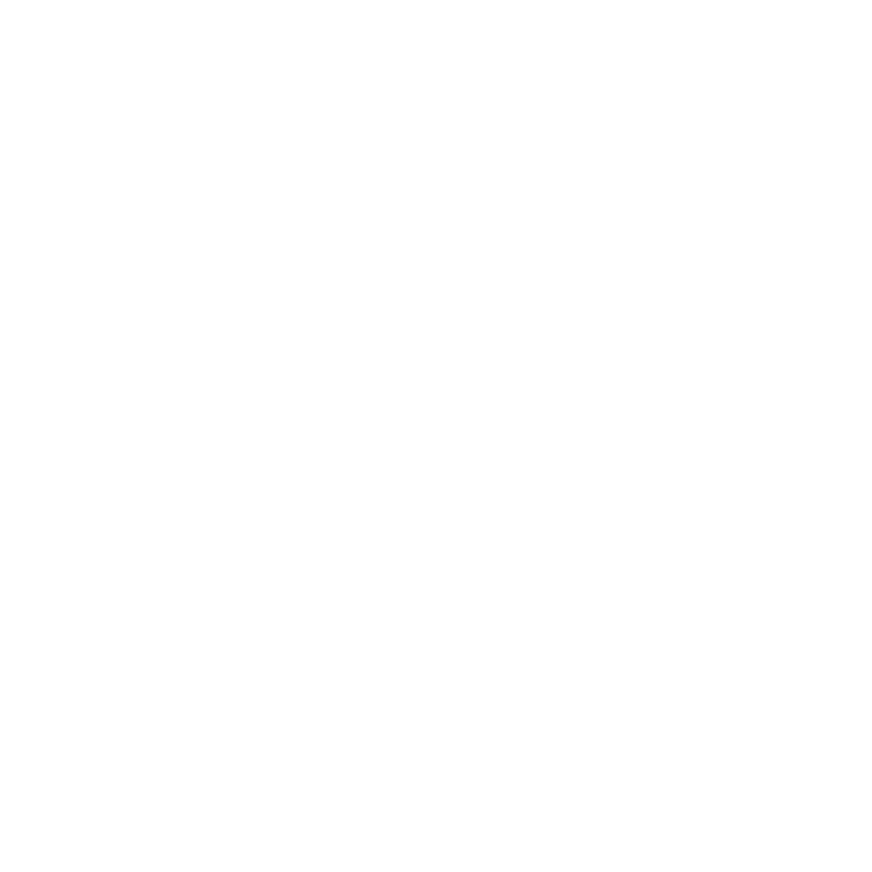

KeyError: 'retina_thick'

In [171]:
''' test range focal length '''

# initialise 3d figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(0., 50.)
ax.set_ylim(-5., 5.)
ax.set_zlim(-5., 5.)


## ray tracing
rays = []

stp = .5
rng = 3.
for Lz in np.arange(-rng, rng + stp, stp)[:]:
    for Ly in np.arange(-rng, rng + stp, stp)[:]:

        # origin ray position and direction vector
        L0 = np.array([0., Ly, Lz])
        v = np.array([1., 0., 0.])
        # normalise direction vector to unit
        v = v / np.linalg.norm(v)

        rays.append([L0, v])


# define range of focal scales (inf. to near)
focus = [0., .5, 1.]#[::-1]

cnorm = colors.Normalize(vmin = 0, vmax = len(focus)); smap = cmx.ScalarMappable(norm = cnorm, cmap = 'magma')

# for each focal length
for f in range(len(focus)):    
    c = smap.to_rgba(f)

    # generate standard optics chain
    params = {
        'eye_front': 20.,
        'cornea_sph': 1.,
        'cornea_axis': 0.,
        'cornea_pow': np.sqrt(0.5),
        'cornea_f_rad': 7.8,
        'cornea_r_rad': 6.4,
        'cornea_thick': 0.6,
        'aqueous_thick': 3.0,
        'iris_dia': 4.,
        'lens_thick': 4.,
        'lens_f_rad_max': 10.1,
        'lens_f_rad_min': 5.95,
        'lens_r_rad_max': 6.1,
        'lens_r_rad_min': 4.5,
        'focus': focus[f],
        'lens_pow': np.sqrt(4.5),
        'retina_rad': 12.5,
        'retina_rad': 12.5,
    }
    opts = optics.gen_optics(params)
            
    # get ray paths through optics chain
    paths = optics.get_paths(rays, opts)

    ## plot ray paths
    # iterate over each ray path
    for i in range(len(paths)):

        # check for any refraction of ray with optics
        #if len(paths[i]) > 1:
        # only ray that hit retina
        if len(paths[i]) == 7:
            path = paths[i]

            # iterate ray path through optics
            for j in range(len(path)-1):

                # plot path segment
                ax.plot([path[j][0][0], path[j+1][0][0]],
                        [path[j][0][1], path[j+1][0][1]],
                        [path[j][0][2], path[j+1][0][2]],
                        color = c, alpha = 0.7)

# format and display figure
plt.show()


In [11]:
## calculate ray paths through optics chain to retinal image

# generate standard optics chain
params = {
    'eye_front': 200.,
    'cornea_sph': 1.,
    'cornea_axis': 0.,
    'cornea_pow': np.sqrt(0.5),
    'cornea_f_rad': 7.8,
    'cornea_r_rad': 6.4,
    'cornea_thick': 0.6,
    'aqueous_thick': 3.0,
    'iris_dia': 4.,
    'lens_thick': 4.,
    'lens_f_rad_max': 10.1,
    'lens_f_rad_min': 5.95,
    'lens_r_rad_max': 6.1,
    'lens_r_rad_min': 4.5,
    'focus': 0.,
    'lens_pow': np.sqrt(4.5),
    'retina_thick': 17.2,
    'retina_rad': 12.5,
}
opts = optics.gen_optics(params)

# define rays
rays = []

## ray tracing
#stp = .02
#rng = 1.

#edge_len = 100



#stp = .1
rng = 2.
stp = 2 * rng / 100


for Lz in np.arange(-rng, rng + stp, stp)[:]:
    for Ly in np.arange(-rng, rng + stp, stp)[:]:
        
        # origin ray position and direction vector
        L0 = np.array([0., Ly, Lz])
        v = np.array([1., 0., 0.])
        # normalise direction vector to unit
        v = v / np.linalg.norm(v)
        
        rays.append([L0, v])

# get ray paths through optics chain
paths = optics.get_paths(rays, opts)


ValueError: all the input arrays must have same number of dimensions

<IPython.core.display.Javascript object>


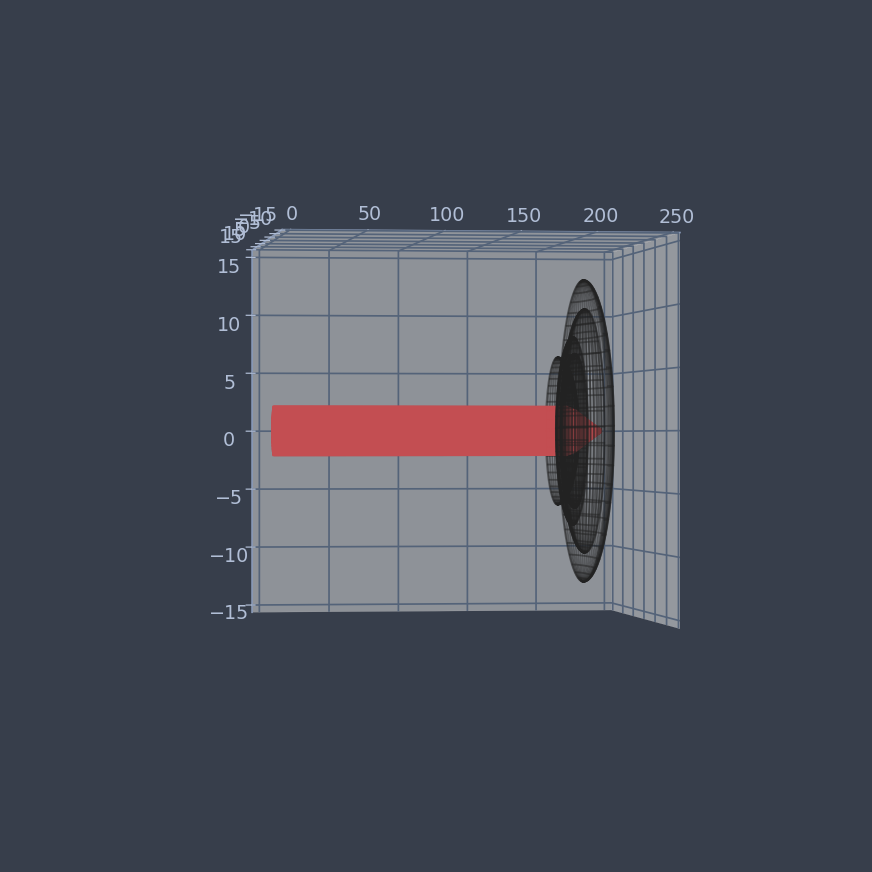

In [182]:
## plot ray paths

# initialise 3d figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(0., 250.)
ax.set_ylim(-15., 15.)
ax.set_zlim(-15., 15.)


# plot all optics
if True:
    # iterate over each optic in chain
    for optic in opts[:]:
        
        # get optic parameters
        C = optic['centre']
        r = optic['radius']
        e = optic['scale']
        n2 = optic['opt_den']
        rev = optic['rev']

        # get optic points in 3d for plotting
        x, y, z = optics.plot_3d_ellipsoid(C, r, e, rev)
        # plot ellipsoid
        ax.plot_wireframe(x, y, z,  rstride = 2, cstride = 2, color = 'k', alpha = 0.5)


# iterate over each ray path
for i in range(len(paths))[::10]:
    
    # check for any refraction of ray with optics
    #if len(paths[i]) > 1:
    # only ray that hit retina
    if len(paths[i]) == 7:
        path = paths[i]
        
        # iterate ray path through optics
        for j in range(len(path)-1):
            
            # plot path segment
            ax.plot([path[j][0][0], path[j+1][0][0]],
                    [path[j][0][1], path[j+1][0][1]],
                    [path[j][0][2], path[j+1][0][2]],
                    color = 'r', alpha = 0.7)

# format and display figure
plt.show()


In [12]:
# import image data from tif file into np array
test_image = optics.import_image('./test-img-1.png').astype(np.float32)
test_image = np.pad(test_image, (1,0), 'edge')

img = test_image.copy()

# define image square length (pixels ~ mm)
edge_len = 101
# scale image by longest edge to edge length
img_scale = ndimage.zoom(img, edge_len / np.max(img.shape), mode = 'nearest', order = 1)
# pad minor edge to edge length
img_scale = np.pad(img_scale, ((0, edge_len - img_scale.shape[0]), (0, edge_len - img_scale.shape[1])), 'edge')


TypeError: import_image() missing 1 required positional argument: 'edge_len'

<IPython.core.display.Javascript object>


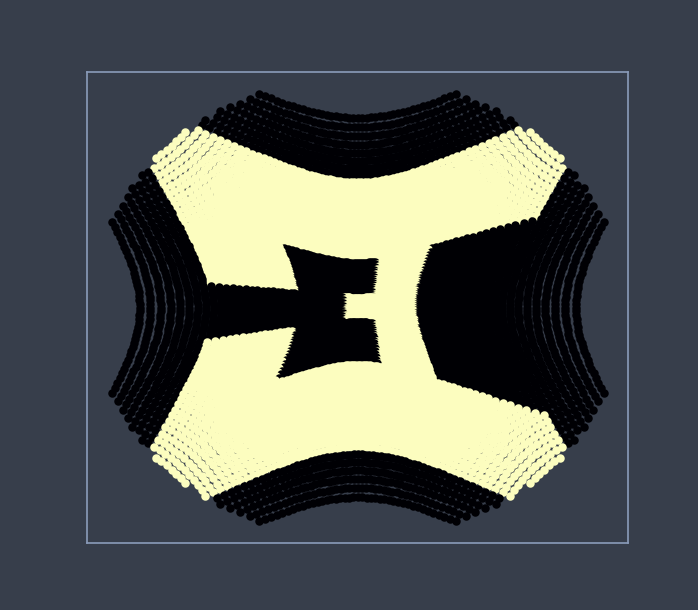

In [164]:
## plot retinal image

plt.figure()

# retinal distance and radius
r = 12.5
d = 32.2
# get retinal image
img = optics.get_retinal_img(paths, r, d)

# get index of only rays that reach retina
j = [ i for i in range(len(paths)) if len(paths[i]) == 7 ]
# get map of image pixel colour to each ray
img_map = img_scale.flatten()[j]

# get colour map for rays
cnorm = colors.Normalize(vmin = img_map.min(), vmax = img_map.max())
#cnorm = colors.Normalize(vmin = 0, vmax = 1.)
smap = cmx.ScalarMappable(norm = cnorm, cmap = 'bone_r')

# iterate each ray initial position
for i in range(len(img))[::]:
    
    # get ray colour
    c = smap.to_rgba(img_map[i])

    # plot 2d retinal image
    plt.plot(img[i][0], img[i][1], 'o', color = c)

plt.grid(); plt.xticks([]); plt.yticks([])
plt.show()


In [158]:
## plot retinal image

# retinal distance and radius
r = 12.5
d = 32.3
# get retinal image
img = optics.get_retinal_img(paths, r, d)

# get index of only rays that reach retina
j = [ i for i in range(len(paths)) if len(paths[i]) == 7 ]
# get map of image pixel colour to each ray
img_map = img_scale.flatten()[j]




# set retinal surface as new curved initial ray positions in reverse
#init_x = - (np.stack([ path[-1][0] for path in paths ])[j][:,0] - (r+d))
#init_x = -(np.stack([ path[-1][0] for path in paths ])[j][:,0])

#init_x = - (np.stack([ path[-1][0] for path in paths ])[j][:,:] - [(r+d), 0, 0])

# generate new list of rays as (x,y,z)
#rev_rays = np.array([ [init_x[i], img[i][0], img[i][1]] for i in range(len(img)) ]).tolist()

# get direction vector for each retinal ray at intersection and reverse
#rev_rays_v = [ np.array([-paths[i][-2][1][0], paths[i][-2][1][1], paths[i][-2][1][2]]) for i in range(len(paths)) if i in j ]

# get retinal ray position and direction vector
rev_rays_p = [ paths[i][-1][0] for i in range(len(paths)) if i in j ] # positions
rev_rays_p = [ rev_rays_p[i] - [(r+d), 0, 0] for i in range(len(rev_rays_p)) ] # x axis to zero
rev_rays_p = [ rev_rays_p[i] * np.array([-1, 1, 1]) for i in range(len(rev_rays_p)) ] # invert x axis

#rev_rays_v = [ -paths[i][-2][1] for i in range(len(paths)) if i in j ]
rev_rays_v = [ paths[i][-2][1] * np.array([1, -1, -1]) for i in range(len(paths)) if i in j ]

back_rays = [ [rev_rays_p[i], rev_rays_v[i]] for i in range(len(rev_rays_p)) ]


In [207]:
## plot reverse ray paths

# generate standard optics chain
params = {
    'eye_front': 20.,
    'cornea_sph': 0.8,
    'cornea_axis': 0.,
    'cornea_pow': np.sqrt(0.5),
    'cornea_f_rad': 7.8,
    'cornea_r_rad': 6.4,
    'cornea_thick': 0.6,
    'aqueous_thick': 3.0,
    'iris_dia': 4.,
    'lens_thick': 4.,
    'lens_f_rad_max': 10.1,
    'lens_f_rad_min': 5.95,
    'lens_r_rad_max': 6.1,
    'lens_r_rad_min': 4.5,
    'focus': 0.,
    'lens_pow': np.sqrt(4.5),
    'retina_thick': 17.2,
    'retina_rad': 12.5,
}
rev_opts = optics.gen_optics_rev(params)


# get ray paths through optics chain
#paths = optics.get_paths(rays, opts)
rev_paths = optics.get_paths(back_rays, rev_opts, n0 = 1.337)


<IPython.core.display.Javascript object>


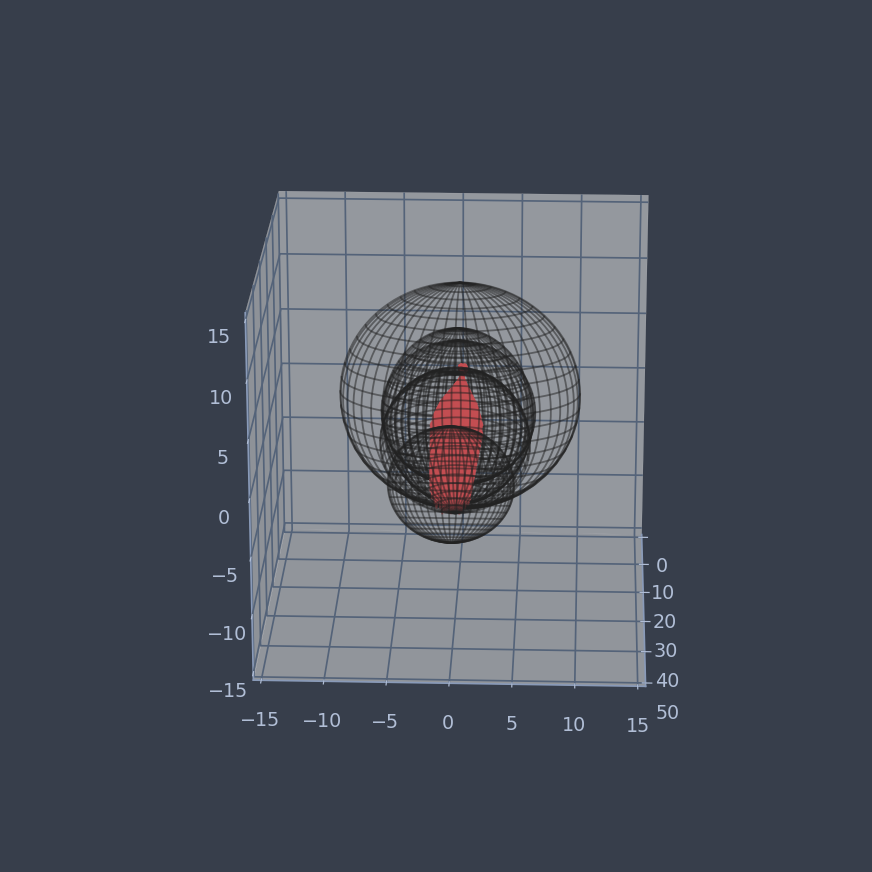

In [208]:
# initialise 3d figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(0., 50.)
ax.set_ylim(-15., 15.)
ax.set_zlim(-15., 15.)


# plot all optics
if True:
    # iterate over each optic in chain
    for optic in rev_opts[:]:
        
        # get optic parameters
        C = optic['centre']
        r = optic['radius']
        e = optic['scale']
        n2 = optic['opt_den']
        rev = optic['rev']

        # get optic points in 3d for plotting
        x, y, z = optics.plot_3d_ellipsoid(C, r, e, rev)
        # plot ellipsoid
        ax.plot_wireframe(x, y, z,  rstride = 2, cstride = 2, color = 'k', alpha = 0.5)


# iterate over each ray path
for i in range(len(rev_paths))[::20]:
    
    # check for any refraction of ray with optics
    if len(paths[i]) > 1:
    # only ray that hit retina
    #if len(paths[i]) == 7:
        path = rev_paths[i]
        
        # iterate ray path through optics
        for j in range(len(path)-1)[:]:
            
            # plot path segment
            ax.plot([path[j][0][0], path[j+1][0][0]],
                    [path[j][0][1], path[j+1][0][1]],
                    [path[j][0][2], path[j+1][0][2]],
                    color = 'r', alpha = 0.7)

# format and display figure
plt.show()


<IPython.core.display.Javascript object>


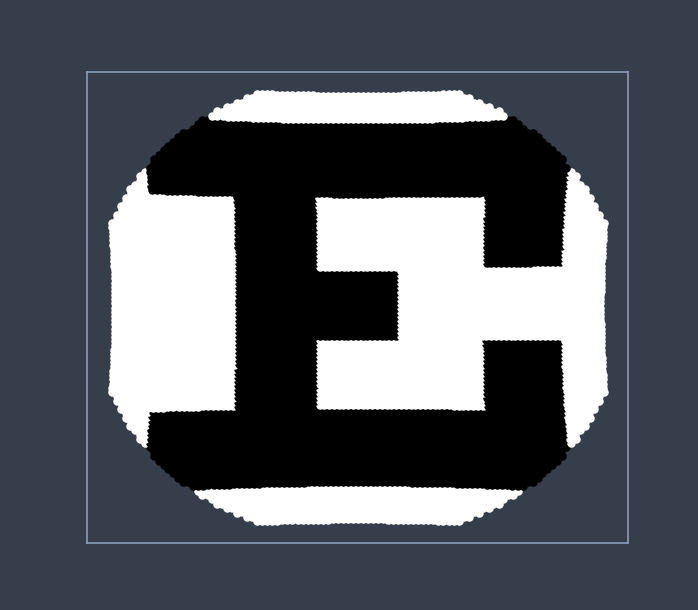

In [209]:
## plot reversed retinal image

plt.figure()

# get retinal image
#img = optics.get_retinal_img(paths, r, d)
r_img = np.stack([ path[-1][0] for path in rev_paths ])[:,1:]

# get index of only rays that reach retina
#j = [ i for i in range(len(paths)) if len(paths[i]) == 7 ]
# get map of image pixel colour to each ray
#img_map = img_scale.flatten()[j]

# get colour map for rays
cnorm = colors.Normalize(vmin = img_map.min(), vmax = img_map.max())
#cnorm = colors.Normalize(vmin = 0, vmax = 1.)
smap = cmx.ScalarMappable(norm = cnorm, cmap = 'bone_r')

# iterate each ray initial position
for i in range(len(r_img))[::]:
    
    # get ray colour
    c = smap.to_rgba(img_map[i])

    # plot 2d retinal image
    plt.plot(r_img[i][0], r_img[i][1], 'o', color = c)

plt.grid(); plt.xticks([]); plt.yticks([])
plt.show()


In [221]:
r_img.shape

(8801, 2)

In [223]:
img_map.shape

(8801,)

In [226]:
pts = np.column_stack([r_img, img_map.T])
pts.shape

(8801, 3)

In [262]:
xs.shape

(101,)

In [263]:

#rng = 2.
#stp = 2 * rng / 100

#xs = np.arange(-2, 2.05, 0.05)
xs = np.arange(-rng, rng + stp, stp)[:]
#ys = np.arange(-2, 2.05, 0.05)
ys = np.arange(-rng, rng + stp, stp)[:]

grid = np.zeros((xs.shape[0],ys.shape[0]))

for i in range(len(xs)-1):
    for j in range(len(ys)-1):
        k = np.where(
            (pts[:,0] >= xs[i]) &
            (pts[:,0] <= xs[i+1]) &
            (pts[:,1] >= ys[j]) &
            (pts[:,1] <= ys[j+1])
        )
        #print(len(pts[k]))
        if len(k[0]) > 0:
            grid[j,i] = np.mean(pts[k][:,2])


<IPython.core.display.Javascript object>


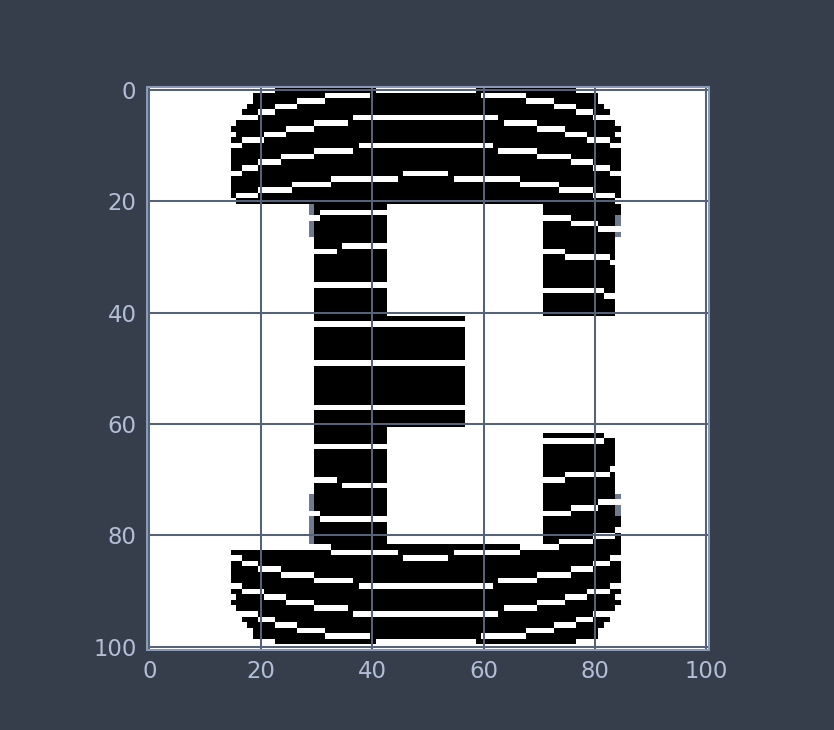

In [264]:
plt.figure()
plt.imshow(grid, cmap = 'bone_r')
plt.show()

In [233]:
pts[k]

array([], shape=(0, 3), dtype=float64)

In [10]:
# import image data from tif file into np array
test_image = optics.import_image('./test-img-1.png').astype(np.float32)
test_image = np.pad(test_image, (1,0), 'edge')
test_image.shape

(101, 101)

In [11]:
img = test_image.copy()

# define image square length (pixels ~ mm)
edge_len = 101
# scale image by longest edge to edge length
img_scale = ndimage.zoom(img, edge_len / np.max(img.shape), mode = 'nearest', order = 1)
# pad minor edge to edge length
img_scale = np.pad(img_scale, ((0, edge_len - img_scale.shape[0]), (0, edge_len - img_scale.shape[1])), 'edge')
